In [ ]:
''' Title: Sentiment Analysis with NLP
 PERFORM SENTIMENT ANALYSIS ON A DATASET OF CUSTOMER REVIEWS USING TF-IDF VECTORIZATION AND LOGISTIC REGRESSION.
    Expected Output 
         NOTEBOOK SHOWCASING PREPROCESSING, MODELING AND SENTIMENT EVALUATION'''

In [ ]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# LOADING DATASET
df = pd.read_csv("twitter.csv")
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# TEXT PREPROCESSING FUNCTION : cleans tweet text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.strip()
    return text


In [ ]:
# Apply preprocessing to create a new column
df["clean_tweet"] = df["tweet"].apply(preprocess_text)
df.head()


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i cant use cause they d...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [ ]:
# BALANCING DATASET
pos = df[df['label'] == 1]       # Separate positive tweets
neg = df[df['label'] == 0]       # Separate negative tweets

neg_sample = neg.sample(n=len(pos), random_state=42)    # Randomly sample negative tweets=positive tweets
balanced_df = pd.concat([pos, neg_sample])               # Combine both classes

balanced_df['label'].value_counts()     # Check new label distribution


label
1    2242
0    2242
Name: count, dtype: int64

In [ ]:
# DEFINING FEATURES AND TARGET

X = balanced_df["clean_tweet"]    # X = cleaned tweet text
y = balanced_df["label"]        # y = sentiment label


In [ ]:
# TRAIN-TEST SPLIT

# Splitting dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# TF-IDF VECTORIZATION

# Convert text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer(max_features=8000, ngram_range=(1,2))

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [ ]:
# TRAINING LOGISTIC REGRESSION MODEL
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
# MODEL EVALUATION
from sklearn.metrics import accuracy_score,  classification_report

y_pred = model.predict(X_test)   # Predicting on test data

print("Accuracy:", accuracy_score(y_test, y_pred))   # Print Accuracy

Accuracy: 0.8595317725752508


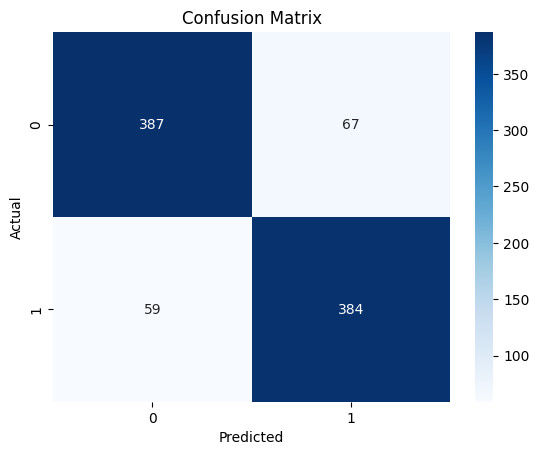

In [ ]:
# CONFUSION MATRIX VISUALIZATION
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# CLASSIFICATION REPORT
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       454
           1       0.85      0.87      0.86       443

    accuracy                           0.86       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.86      0.86      0.86       897



In [ ]:
# SENTIMENT PREDICTION FUNCTION

# Function to predict sentiment of new text
def predict_sentiment(text):
    text = preprocess_text(text)
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    
    # SWAPPED MAPPING
    return "Negative" if pred == 1 else "Positive"       # Mapping 0 = Negative, 1 = Positive


In [ ]:
# Testing the function
predict_sentiment("I love this new phone")


'Positive'

In [ ]:
# Testing the function
predict_sentiment("This is the worst product ever")


'Negative'

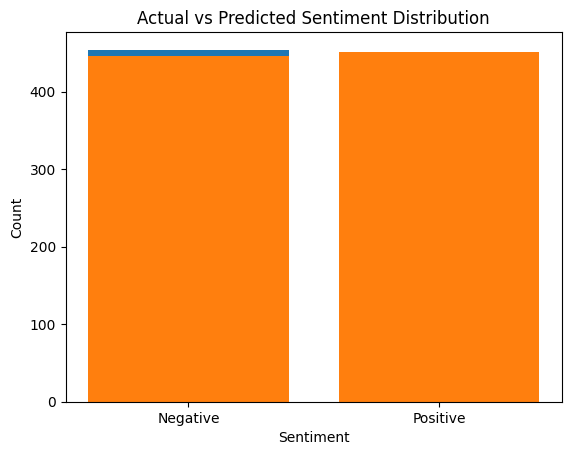

In [ ]:
# BAR GRAPH: ACTUAL VS PREDICTED
import matplotlib.pyplot as plt
import pandas as pd

actual_counts = pd.Series(y_test).value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

labels = ["Negative", "Positive"]

plt.figure()
plt.bar(labels, actual_counts.values)
plt.bar(labels, pred_counts.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Actual vs Predicted Sentiment Distribution")
plt.show()
